# A Pleasent Flight
 Historical Air Crash + Delay Investigation

Unfortunely, there were many aviation accidents that caused innocent people to perish. While lessons we learnt in the past tragedy have made flying now more and more safer, the figures of planes falling from the sky still frightens a few people from having a pleasent flight. In this data analysis, we are going persuade thoes who are afraid by to investigate how safe are planes and, if one is still concerned, how to maximize one's safety? To make our report also interesting to general public, we will also investigate how one can minimize delays. 

In [2]:
import pandas as pd
import numpy as np
from numpy import nan as Nan

import xml.etree.ElementTree as ET # to read one dataset in XML format

In [5]:
crash_df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
etree = ET.parse("AviationData.xml")



In [6]:
xml_root = etree.getroot()

interest_columns = ["EventId","EventDate","Location","Country","Latitude","Longitude","AirportCode","InjurySeverity","AircraftDamage",
                    "AircraftCategory","NumberOfEngines","EngineType","Schedule","TotalUninjured","TotalMinorInjuries",
                    "TotalSeriousInjuries","TotalFatalInjuries","WeatherCondition","BroadPhaseOfFlight","RegistrationNumber","PurposeOfFlight"]

NTSB_crash_df = pd.DataFrame(columns=interest_columns)

for elem in xml_root: # This loop will run only once
    for row in elem: 
        if not(row.attrib["PurposeOfFlight"]=="Business"):
            continue
        information = list()
        for interest in interest_columns:
            if not (row.attrib[interest]==""):
                information.append(row.attrib[interest])
            else:
                information.append(Nan)
        row_information = pd.Series(information,index=interest_columns)
        NTSB_crash_df = NTSB_crash_df.append(row_information,ignore_index=True)
            
# this may need to run for a while. It takes 18 seconds on my computer
    

In [10]:
NTSB_crash_df[(NTSB_crash_df["AircraftCategory"]=="Airplane") & (NTSB_crash_df["EngineType"]!="Reciprocating")]

,EventId,EventDate,Location,Country,Latitude,Longitude,AirportCode,InjurySeverity,AircraftDamage,AircraftCategory,...,EngineType,Schedule,TotalUninjured,TotalMinorInjuries,TotalSeriousInjuries,TotalFatalInjuries,WeatherCondition,BroadPhaseOfFlight,RegistrationNumber,PurposeOfFlight
2,20191031X31506,10/31/2019,"New Braunfels, TX",United States,29.705833,-98.043333,BAZ,Non-Fatal,Minor,Airplane,...,NaN,NaN,1,NaN,1,NaN,VMC,NaN,N850BK,Business
6,20191021X62154,10/16/2019,"Augusta, GA",United States,33.371945,-81.971667,AGS,Non-Fatal,NaN,Airplane,...,Turbo Fan,NaN,NaN,NaN,1,NaN,VMC,TAXI,N307KP,Business
7,20191005X82852,10/05/2019,"Kokomo, IN",United States,40.475000,-86.063333,OKK,Fatal(1),Destroyed,Airplane,...,NaN,NaN,NaN,NaN,NaN,1,VMC,MANEUVERING,N326CW,Business
8,20191003X13056,10/03/2019,"Lansing, MI",United States,42.780278,-84.606111,LAN,Fatal(5),Substantial,Airplane,...,Turbo Prop,NaN,NaN,NaN,1,5,IMC,APPROACH,N700AQ,Business
10,20190829X34852,08/29/2019,"Olney, TX",United States,33.350833,-98.819167,ONY,Non-Fatal,Substantial,Airplane,...,Turbo Prop,NaN,NaN,1,NaN,NaN,VMC,TAKEOFF,N8517Q,Business
14,20190815X74831,08/15/2019,"Elizabethton, TN",United States,36.367223,-82.181667,0A9,Non-Fatal,Destroyed,Airplane,...,Turbo Fan,NaN,2,3,NaN,NaN,VMC,LANDING,N8JR,Business
16,20190813X55350,08/08/2019,"Lubbock, TX",United States,32.845833,-96.850833,NaN,Non-Fatal,NaN,Airplane,...,Turbo Fan,NaN,7,2,1,NaN,VMC,TAKEOFF,N237QS,Business
17,20191028X02005,08/07/2019,"Hamburg, Germany",Germany,NaN,NaN,EDDH,Incident,Minor,Airplane,...,Turbo Fan,NaN,5,NaN,NaN,NaN,UNK,TAKEOFF,NaN,Business
19,20190801X94426,08/01/2019,"Novato, CA",United States,38.141111,-122.555833,DVO,Non-Fatal,Substantial,Airplane,...,Turbo Prop,NaN,2,NaN,NaN,NaN,VMC,LANDING,N234SB,Business
25,20190630X33829,06/30/2019,"Addison, TX",United States,32.966111,-96.832778,ADS,Fatal(10),Destroyed,Airplane,...,Turbo Prop,NaN,NaN,NaN,NaN,10,VMC,TAKEOFF,N534FF,Business


## Cleaning progress----------------------------------------------------------------------------

In [ ]:
    
        row.attrib["EventId"] #flight crash ID
        row.attrib["EventDate"] # Crash /Accident date 
        row.attrib["Location"] # Text location 
        row.attrib["Country"] # Country
        row.attrib["Latitude"] # Latitude
        row.attrib["Longitude"] # Longitude
        row.attrib["AirportCode"] # 3 digit airport code, for example LAX
        row.attrib["InjurySeverity"] # Non-Fatal / Fatal
        row.attrib["AircraftDamage"] # 
        row.attrib["AircraftCategory"] # Airplane / 
        row.attrib["NumberOfEngines"] # Number of engines
        row.attrib["EngineType"] # Engine type
        row.attrib["Schedule"]
        row.attrib["PurposeOfFlight"] # Instructional / 
        row.attrib["TotalUninjured"]
        row.attrib["TotalMinorInjuries"]
        row.attrib["TotalSeriousInjuries"]
        row.attrib["TotalFatalInjuries"]
        row.attrib["WeatherCondition"]
        row.attrib["BroadPhaseOfFlight"] # Approach / 
        row.attrib["AirCarrier"] # company who is operating this aircraft
        # we also have PublicationDate,ReportStatus, FARDescription,AmateurBuilt,Model,Make,AirportName,AccidentNumber,InvestigationType
        

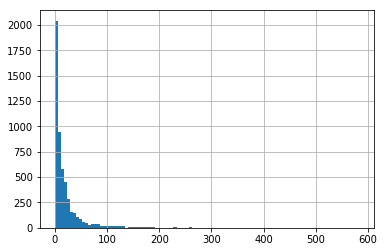

In [20]:
crash_df["Fatalities"].dropna().hist(bins=100)

In [10]:
def process_time(input_time):
    if not(pd.isna(input_time) or len(str(input_time))==5):
        s = str(input_time)
        hr = 0
        mi = 0
        try:
            hr = int(s[0:2])
            mi = int(s[3:5])
        except:
            print(input_time)
        num = hr * 60 + mi
        return num
    return np.nan

In [11]:
crash_df.loc[:,"Time"].apply(process_time).hist()

c: 1:00
c:17:00
c: 2:00
c:09:00
1:30
c16:50
c:09:00
114:20
c14:30
1:00
2:40
c: 9:40
2:00
8:02
9:30


In [68]:
crash_df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [14]:
df = pd.read_csv("airports-extended.csv")

In [18]:
sum(df.iloc[:,3]=="United States")

2295

In [23]:
df = pd.read_csv("2009.csv")

In [26]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,...,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,...,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,...,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,...,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2009-01-01,XE,1212,ATL,EWR,1915,1913.0,-2.0,19.0,1932.0,...,147.0,130.0,96.0,745.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2009-01-01,XE,1212,CLE,ATL,1645,1637.0,-8.0,12.0,1649.0,...,117.0,108.0,91.0,554.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2009-01-01,XE,1214,DCA,EWR,1915,1908.0,-7.0,9.0,1917.0,...,80.0,79.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2009-01-01,XE,1215,EWR,DCA,1715,1710.0,-5.0,28.0,1738.0,...,83.0,73.0,41.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2009-01-01,XE,1217,EWR,DCA,1300,1255.0,-5.0,15.0,1310.0,...,68.0,61.0,39.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
